# GRAPH

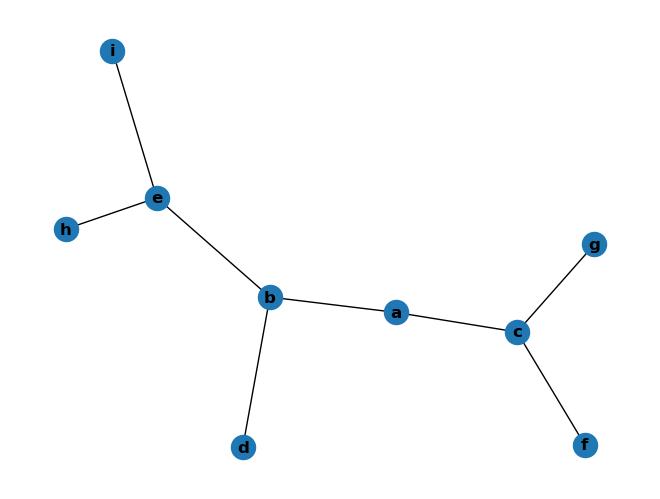

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

graph = {
    'a': ['b','c'],
    'b': ['d','e'],
    'c': ['f','g'],
    'd': [],
    'e': ['h','i'],
    'f': [],
    'g': [],
    'h': [],
    'i': []
}

G = nx.Graph()
for node in graph.keys():
    for edge in graph[node]:
        G.add_edge(node,edge)
        
nx.draw(G,with_labels=True,font_weight='bold')


# BFS

In [3]:
explored = set()
frontier = []
def bfs(graph,explored,frontier,ins,gos):
    frontier.append(ins)
    explored.add(ins)
    while frontier:
        if gos==frontier[0]:
            e = frontier.pop(0)
            print(e,end=" ")
            return 
        else:
            e = frontier.pop(0)
            print(e,end=" ")
            for adj in graph[e]:
                if adj not in explored:
                    frontier.append(adj)
                    explored.add(adj)

bfs(graph,explored,frontier,'a','i')

a b c d e f g h i 

# DFS

In [17]:
explored = set()

def dfs(graph,explored,ins,gos):
    if ins not in explored:
        print(ins,end=" ")
        explored.add(ins)
        if ins==gos:
            return True
        for adj in graph[ins]:
            if dfs(graph,explored,adj,gos):
                return True
    return False

dfs(graph,explored,'a','c')

a b d e h i c 

True

# IDS

In [21]:
explored=set()
def dls(graph,explored,ins,gos,d):
    if ins not in explored:
        print(ins,end=" ")
        #explored.add(ins)
        if ins==gos:
            return True
        if d>0:
            flag = False
            for adj in graph[ins]:
                if dls(graph,explored,adj,gos,d-1):
                    flag=True
                    break
            return flag

def ids(graph,explored,ins,gos,maxd):
    explored.clear()
    for i in range(maxd+1):
        print()
        print("Depth ",i)
        if dls(graph,explored,ins,gos,i):
            print()
            print("Goal found")
            break

ids(graph,explored,'a','g',5)


Depth  0
a 
Depth  1
a b c 
Depth  2
a b d e c f g 
Goal found


# WEIGHTED GRAPH

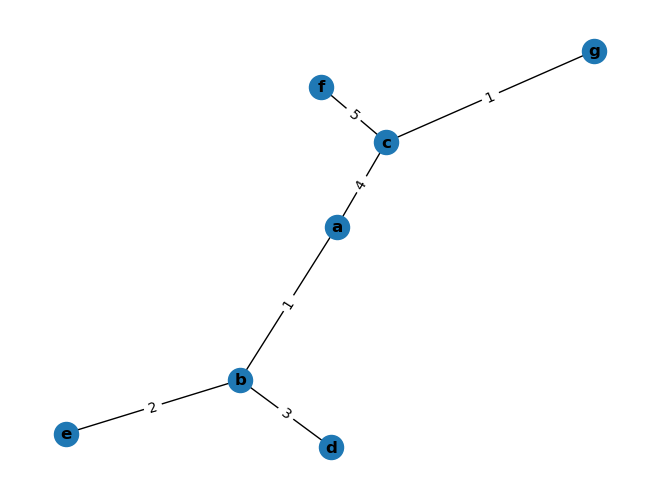

In [29]:
wg = {
    'a': [('b', 1), ('c', 4)],
    'b': [('d', 3), ('e', 2)],
    'c': [('f', 5), ('g', 1)],
    'd': [],
    'e': [],
    'f': [],
    'g': []
}

G = nx.Graph()

for node in wg.keys():
    for edge,weight in wg[node]:
        G.add_edge(node,edge,weight=weight)
        
pos = nx.spring_layout(G)
nx.draw(G,pos,with_labels=True,font_weight = 'bold')

edge_labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G,pos,edge_labels=edge_labels)
plt.show()

# UCS

In [30]:
explored = set()
def UCS(wg,explored,ins,gos):
    frontier = [(0,ins)]
    while frontier:
        frontier.sort()
        cost,state = frontier.pop(0)
        if state not in explored:
            print(state,end=" ")
            explored.add(state)
            if state==gos:
                return True
            for neighbour,weight in wg[state]:
                frontier.append((cost+weight,neighbour))
    
UCS(wg,explored,'a','g')


a b e c d g 

True

# GBFS

In [33]:
h_v={'a':11,'b':6,'c':99,'d':1,'e':7,'g':0}
explored=set()
def GBFS(graph,explored,ins,gos):
    x = ins
    frontier = [(0,ins,x)]
    while frontier:
        frontier.sort()
        cost,state,path = frontier.pop(0)
        if state not in explored:
            explored.add(state)
            if state==gos:
                print("Path : ",path)
                return True
            for neighbour,weight in wg[state]:
                frontier.append((cost+h_v[state],neighbour,str(path+neighbour)))
    return False
GBFS(graph,explored,'a','g')   
    

Path :  acg


True

# ASTAR

In [39]:
g1={'a':[('b',2),('e',3)],
       'b':[('c',1),('g',9)],
       'e':[('d',6)],
       'c':[],
       'd':[('g',1)],
       'g':[]
      }
h_v={'a':11,'b':6,'c':99,'d':1,'e':7,'g':0}
explored=set()
g = {}
def ASTAR(g1,explored,ins,gos):
    x = ins
    frontier = [(0,ins,x)]
    g[ins]=0
    while frontier:
        frontier.sort()
        frontier.reverse()
        cost,state,path = frontier.pop(0)
        if state not in explored:
            print(state,end="")
            explored.add(state)
            if state==gos:
                print()
                print(g[state])
                #print(path)
                return True
            for neighbour,weight in g1[state]:
                g[neighbour] = weight+g[state]
                frontier.append((g[neighbour]+h_v[neighbour],neighbour,str(path+neighbour)))
ASTAR(g1,explored,'a','g')  

aedg
10


True